In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pylt

import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from patsy import dmatrices

%matplotlib inline

df = pd.read_csv('Desktop\\Python\\Titanic\\titanic2.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Pclass'].isnull().value_counts()
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [4]:
#Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)
print("Surviors per", survivors)

#Passengers survived in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
print("Passengers per", total_passengers)

survivor_percentage = survivors/total_passengers
print("Survivor percentage per", survivor_percentage)

Surviors per Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Passengers per Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
Survivor percentage per Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


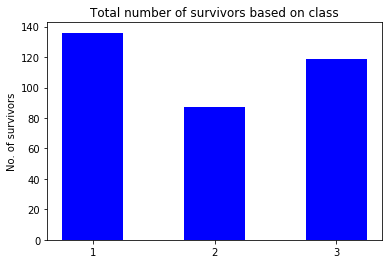

In [6]:
#Plotting the Total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel("No. of survivors")
ax.set_title("Total number of survivors based on class")
ax.set_xticks(survivors.index.values.tolist())
xTickMarks = survivors.index.values.tolist()
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=10)
plt.show()

In [7]:
#Checking for surviors based on gender
df['Sex'].isnull().value_counts()  #check null value

#Number of Males who survived one way to compute, but will output all other columns as well
#male_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 1)] 
#print(male_survivors.sum())

#Number of Males who survived
male_survivors = ((df['Sex'] == 'male') & (df['Survived'] == 1)).sum()
print("Number of males who survived", male_survivors)

#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
print(male_total_passengers)

# Male Passengers who survived in each class using .count()
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].count() # when you use .count() it will return all males as per PClass
# since Survived here includes both 0 and 1
print(male_survivors)        

# Male Passengers who survived in each class using .sum()
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].sum() # when you use .sum() it will return all males as per PClass
# who survived, even though you are not using conditional check for 0 and 1. When you do Sum, summing all 0 gives 0 and summing all 1
# gives you the correct number of survivors. But had this column included other numbers than 0 and 1, then you won't get the correct survived output
print(male_survivors)

male_survivor_percentage = male_survivors / male_total_passengers
print(male_survivor_percentage)

Number of males who survived 109
Pclass
1    122
2    108
3    347
Name: PassengerId, dtype: int64
Pclass
1    122
2    108
3    347
Name: Survived, dtype: int64
Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64
Pclass
1    0.368852
2    0.157407
3    0.135447
dtype: float64


In [8]:
# Total female passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
print(female_total_passengers)

# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].sum()
print(female_survivors)

# Female survivor percentage
female_survivor_percentage = female_survivors/female_total_passengers
print("Female survivor percentage", female_survivor_percentage)

Pclass
1     94
2     76
3    144
Name: PassengerId, dtype: int64
Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64
Female survivor percentage Pclass
1    0.968085
2    0.921053
3    0.500000
dtype: float64


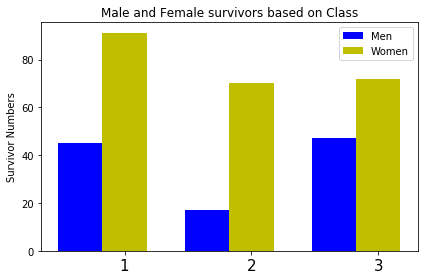

In [9]:
# Plotting survivors based on gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label = 'Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on Class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
#distribution of nonsurvivors among the various classes who have family aboard the ship?

df['SibSp'].isnull().value_counts()  # check if null
df['Parch'].isnull().sum()

#total number of nonsurvivors
#non_survivors = (df['Survived'] == 0).sum()
#print(non_survivors)

non_survivors = ((df['Survived'] == 0) & ((df['SibSp'] != 0) | (df['Parch'] != 0))).sum()
print("Total number of non survivors", non_survivors)

#Total number of non-survivors in each class
non_survivors = df[((df['Survived'] == 0) & ((df['SibSp'] != 0) | (df['Parch'] != 0)))].groupby('Pclass')['Survived'].count()
print(non_survivors)

total_passengers = df.groupby('Pclass')['PassengerId'].count()
print("Total Number of passengers per class", total_passengers)

non_survivor_percentage = non_survivors/total_passengers
print(non_survivor_percentage)

Total number of non survivors 175
Pclass
1     29
2     29
3    117
Name: Survived, dtype: int64
Total Number of passengers per class Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
Pclass
1    0.134259
2    0.157609
3    0.238289
dtype: float64


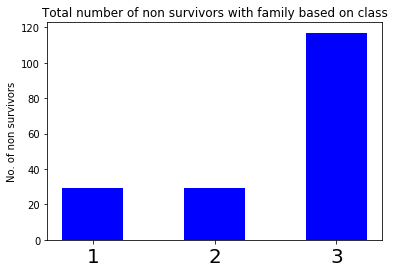

In [11]:
#Total number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

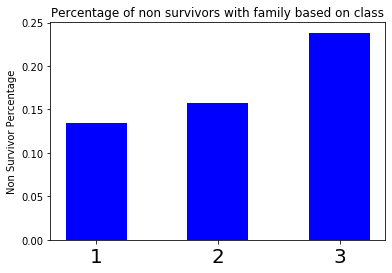

In [12]:
#Plot of percentage of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

In [2]:
# Survival percentage among different age groups
df['Age'].isnull().value_counts() # Checking null values

# Create bin interval for different age groups
age_bin = [0, 18, 25, 40, 60, 100]  # Defining the age bin interval
df['AgeBin'] = pd.cut(df.Age, bins = age_bin)

# Removing null rows
d_temp = df[np.isfinite(df['Age'])] # isfinite function checks for numbers which are not infinite and not null, so anything other that that it
# will store in d_temp dataframe. Basically d_temp dataframe will inherit all columns & rows data from df except null value rows in Age
d_temp.head()
print("Number of passengers after removing null values", d_temp['PassengerId'].count())

survivors = d_temp.groupby('AgeBin')['Survived'].sum()
print("Survivors as per each", survivors)

#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].count()
print("Total Passengers each", total_passengers)

Number of passengers after removing null values 714
Survivors as per each AgeBin
(0, 18]       70
(18, 25]      54
(25, 40]     111
(40, 60]      50
(60, 100]      5
Name: Survived, dtype: int64
Total Passengers each AgeBin
(0, 18]      139
(18, 25]     162
(25, 40]     263
(40, 60]     128
(60, 100]     22
Name: Survived, dtype: int64


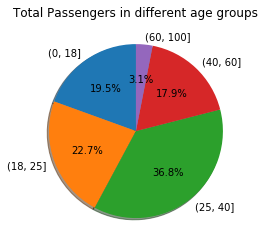

In [3]:
#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels = total_passengers.index.values.tolist(), autopct = '%1.1f%%', shadow = True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

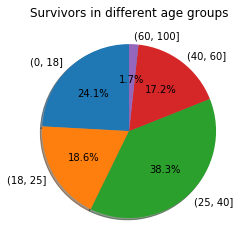

In [4]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=survivors.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

In [12]:
#BUILDING LOGISTIC MODEL
df.count()
df.head()

# We'll remove Cabin, Ticket and Name columns from our DataFrame
# Applying axis as 1 to remove the columns with the following labels

df = df.drop(['Ticket','Cabin','Name'], axis=1)
df.head()

# Remove missing values
df = df.dropna()
df.count()

PassengerId    712
Survived       712
Pclass         712
Sex            712
Age            712
SibSp          712
Parch          712
Fare           712
Embarked       712
dtype: int64

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [39]:
#Convert Categorical variables into dummy variables
#pclass = pd.get_dummies(df['Pclass'], drop_first=True)
#sex = pd.get_dummies(df['Sex'], drop_first=True)
#embark = pd.get_dummies(df['Embarked'], drop_first=True)

#df.drop(['Sex','Embarked', 'Pclass'],axis=1,inplace=True) #Drop categorical variables from data df
#print(df.head())

#df = pd.concat([df, pclass, sex, embark],axis=1) # And Add the new dummy variables to the data df
#df.head()

In [15]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Parch'
formula

'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Parch'

In [104]:
# create a results dictionary to hold our regression results for easy analysis later
df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]
df_train.count()
df_test.count()

PassengerId    112
Survived       112
Pclass         112
Sex            112
Age            112
SibSp          112
Parch          112
Fare           112
Embarked       112
dtype: int64

In [105]:
#Splitting the data into dependent and independent variables
y_train, x_train = dmatrices(formula, data=df_train, return_type='dataframe')

In [106]:
y_test, x_test = dmatrices(formula, data=df_test, return_type='dataframe')

In [8]:
x_train.head()

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Age,SibSp,Parch
0,1.0,0.0,1.0,1.0,0.0,1.0,22.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,38.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,35.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0,1.0,35.0,0.0,0.0


In [9]:
x_test.head()

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Age,SibSp,Parch
754,1.0,1.0,0.0,0.0,0.0,1.0,48.00,1.0,2.0
755,1.0,1.0,0.0,1.0,0.0,1.0,0.67,1.0,1.0
756,1.0,0.0,1.0,1.0,0.0,1.0,28.00,0.0,0.0
757,1.0,1.0,0.0,1.0,0.0,1.0,18.00,0.0,0.0
758,1.0,0.0,1.0,1.0,0.0,1.0,34.00,0.0,0.0


In [107]:
# instantiate our model
#model = lm.LogisticRegression()
model = sm.Logit(y_train, x_train)
model = model.fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.331     
Dependent Variable: Survived         AIC:              554.1516  
Date:               2020-02-16 13:49 BIC:              580.5332  
No. Observations:   600              Log-Likelihood:   -271.08   
Df Model:           5                LL-Null:          -404.99   
Df Residuals:       594              LLR p-value:      8.1718e-56
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         4.1050   0.4787   8.5747 0.0000  3.1667  5.0433
C(Pclass)[T.2]   -1.2971   0.3058  -4.2416 0.0000 -1.8964 -0.6977
C(Pclass)[T.3]   -2.5739   0.3052  -8.4327 0.0000 -3.1721 -1.9757
C(Sex)[T.male]   -2.5808   0.2347 -10.9961 0.0000 -3.0408 -2.1208
Age              -0.0401   0.0088  -4.5494 0.0000 -0.0573 -0.0228
SibSp            -0.3691   0.1300  -2.8402 0.0045 -0.6238 -0.1144
=================================================================

"""

In [108]:
# From the summary above, we can see that the port of embarkation and number of Parch are insignificant predictors 
# as their p-values are higher than 0.05 so we are going to drop them and build the regression function again
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp'

y_train, x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test, x_test = dmatrices(formula, data=df_test, return_type='dataframe')

# instantiate our model
model = sm.Logit(y_train, x_train)
model = model.fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.331     
Dependent Variable: Survived         AIC:              554.1516  
Date:               2020-02-16 13:49 BIC:              580.5332  
No. Observations:   600              Log-Likelihood:   -271.08   
Df Model:           5                LL-Null:          -404.99   
Df Residuals:       594              LLR p-value:      8.1718e-56
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         4.1050   0.4787   8.5747 0.0000  3.1667  5.0433
C(Pclass)[T.2]   -1.2971   0.3058  -4.2416 0.0000 -1.8964 -0.6977
C(Pclass)[T.3]   -2.5739   0.3052  -8.4327 0.0000 -3.1721 -1.9757
C(Sex)[T.male]   -2.5808   0.2347 -10.9961 0.0000 -3.0408 -2.1208
Age              -0.0401   0.0088  -4.5494 0.0000 -0.0573 -0.0228
SibSp            -0.3691   0.1300  -2.8402 0.0045 -0.6238 -0.1144
=================================================================

"""

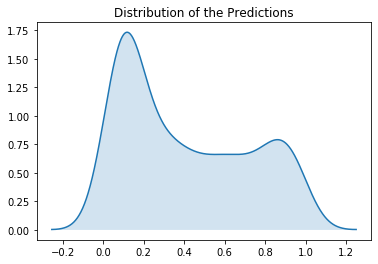

In [109]:
# All predictor variables are significant as per their pvalue in the summary above
# Model evaluation, Let's see the distribution of the predictions on the training data
kde_model = sm.nonparametric.KDEUnivariate(model.predict())
kde_model.fit()

# Plot KDE result
plt.title("Distribution of the Predictions")
plt.plot(kde_model.support, kde_model.density)
plt.fill_between(kde_model.support, kde_model.density, alpha=0.2)
plt.show()

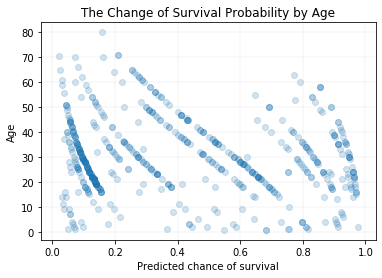

In [110]:
plt.scatter(model.predict(), x_train.Age , alpha=0.2) ## ALso code as plt.scatter(model.predict(), x_train['Age'] , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.ylabel("Age")
plt.xlabel("Predicted chance of survival")
plt.show()

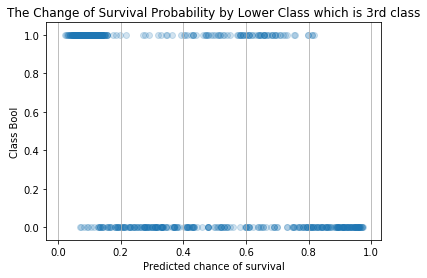

In [111]:
plt.scatter(model.predict(), x_train['C(Pclass)[T.3]'] , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool") # Boolean class to show if its 3rd class
plt.title("The Change of Survival Probability by Lower Class which is 3rd class")
plt.show()

In [112]:
#Evaluating a model based on test data
y_pred = model.predict(x_test)
y_pred_flag = y_pred > 0.7
valflag = pd.crosstab(y_test.Survived, y_pred_flag, rownames = ['Actual'], colnames = ['Predicted']) # Same as Confusion Matrix
print(valflag)

Predicted  False  True 
Actual                 
0.0           67      0
1.0           21     24


In [113]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred_flag)
print(cm)

[[67  0]
 [21 24]]


In [114]:
# CLassification Report
cr = metrics.classification_report(y_test, y_pred_flag)
print(cr)

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        67
         1.0       1.00      0.53      0.70        45

    accuracy                           0.81       112
   macro avg       0.88      0.77      0.78       112
weighted avg       0.86      0.81      0.80       112



In [128]:
# Compute ROC (Receiver Operating Characteristic) and AUC (Area Under Curve)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) #fpr = false_positive_rate, tpr = true_positive_rate
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.879934


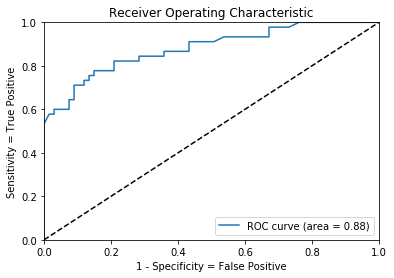

In [147]:
#Plot RUC/AUC Curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--') #Draws the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Receiver Operating Characteristic")
plt.ylabel("Sensitivity = True Positive")
plt.xlabel("1 - Specificity = False Positive")
plt.legend(loc='lower right')
plt.show()

In [211]:
# Model building using SciKit
# instantiate a logistic regression model, and fit with X and y
model = lm.LogisticRegression()
model = model.fit(x_train, y_train.Survived)

C:\Users\suman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [212]:
#examine the coefficients
pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.6790105519020726]
1,C(Pclass)[T.2],[-0.9411538501520048]
2,C(Pclass)[T.3],[-2.139352065329334]
3,C(Sex)[T.male],[-2.343784959775586]
4,Age,[-0.0314323508583484]
5,SibSp,[-0.2976887528797751]


In [215]:
y_pred = model.predict(x_test)
y_pred_flag = y_pred > 0.7

cm = metrics.confusion_matrix(y_test, y_pred_flag)
print(cm)

[[58  9]
 [10 35]]


In [237]:
y_pred = model.predict_proba(x_test)
y_pred_flag = y_pred[:,1] > 0.7       
cm = metrics.confusion_matrix(y_test, y_pred_flag)
print(cm)

[[67  0]
 [23 22]]


In [225]:
cr = metrics.classification_report(y_test, y_pred_flag)
print(cr)

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        67
         1.0       1.00      0.49      0.66        45

    accuracy                           0.79       112
   macro avg       0.87      0.74      0.76       112
weighted avg       0.85      0.79      0.77       112



In [226]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,1]) #fpr = false_positive_rate, tpr = true_positive_rate
roc_auc = metrics.auc(fpr, tpr)
print( "Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.878275


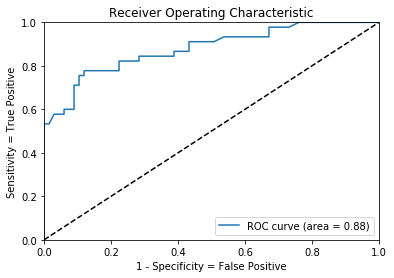

In [227]:
#Plot RUC/AUC Curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--') #Draws the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Receiver Operating Characteristic")
plt.ylabel("Sensitivity = True Positive")
plt.xlabel("1 - Specificity = False Positive")
plt.legend(loc='lower right')
plt.show()

In [228]:
print(pred_y[:,1])

NameError: name 'pred_y' is not defined

In [229]:
print(pred_y)

NameError: name 'pred_y' is not defined